# STARBUCKS_MENU_NUTRITION_DRINK

***Today we are trying the analyse the nutrition content of Starbucks menu and find out 10 beverage that should be best avoided for a healthier choice of diet and suggest 10 choice that are comparatively healthier option.***

In [110]:
# importing requried libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [111]:
data1 = pd.read_csv('starbucks-menu-nutrition-drinks.csv', encoding= 'unicode_escape')

In [112]:
data1.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshersâ¢ Beverage,45,0,11,0,0,10
1,OmbrÃ© Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshersâ¢ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshersâ¢ Be...,60,0,14,1,0,10


In [113]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [114]:
data1.shape

(177, 7)

In [115]:
df = data1.drop_duplicates()

In [116]:
data1.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

DATASET DESCRIPTION


***The dataset gives the list of food items at starbucks along with the nutrient content of each, The calorie,Fat,Carbs,Protein and Fiber is given.***

# DATA CLEANING

In [117]:
data1.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshersâ¢ Beverage,45,0,11,0,0,10
1,OmbrÃ© Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshersâ¢ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshersâ¢ Be...,60,0,14,1,0,10


In [118]:
data1.columns

Index(['Unnamed: 0', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium'],
      dtype='object')

In [119]:
data1 = data1.rename(columns={data1.columns[0]: 'Beverage_Name'})

# Checking the updated column names
print(data1.columns)

Index(['Beverage_Name', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium'],
      dtype='object')


In [120]:
data1 = data1.rename(columns={data1.columns[2]: 'Fat'})
data1 = data1.rename(columns={data1.columns[3]: 'Carb'})
data1 = data1.rename(columns={data1.columns[4]: 'Fiber'})

print(data1.columns)

Index(['Beverage_Name', 'Calories', 'Fat', 'Carb', 'Fiber', 'Protein',
       'Sodium'],
      dtype='object')


In [121]:
columns_to_replace = ['Calories','Fat', 'Carb', 'Fiber', 'Protein', 'Sodium']

for col in columns_to_replace:
    data1[col] = data1[col].replace('-', np.nan)


In [122]:
columns_to_convert = ['Calories','Fat', 'Carb', 'Fiber', 'Protein', 'Sodium']

for col in columns_to_convert:
    data1[col] = data1[col].astype(float)

In [123]:
data1.dtypes

Beverage_Name     object
Calories         float64
Fat              float64
Carb             float64
Fiber            float64
Protein          float64
Sodium           float64
dtype: object

In [124]:
data1.isnull().sum()

Beverage_Name     0
Calories         85
Fat              85
Carb             85
Fiber            85
Protein          85
Sodium           85
dtype: int64

In [125]:
data1_cleaned = data1.dropna()

In [108]:
data1_cleaned.shape

(92, 7)

In [126]:
data1_cleaned.head(3)

,Beverage_Name,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Cool Lime Starbucks Refreshersâ¢ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
3,Strawberry Acai Starbucks Refreshersâ¢ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
4,Very Berry Hibiscus Starbucks Refreshersâ¢ Be...,60.0,0.0,14.0,1.0,0.0,10.0


# Exploratory Data Analysis

In [127]:
data1_cleaned.describe()

,Calories,Fat,Carb,Fiber,Protein,Sodium
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


***Here we can see that the maximum calorie in a beverage is as high as 430 and the least being 0. Similarly each nutrient list has minimum value to be 0. Lets further analyse to see the range in which nutrients are present in these beverages.***

## 1.Nutrient quantity analysis on Beverage

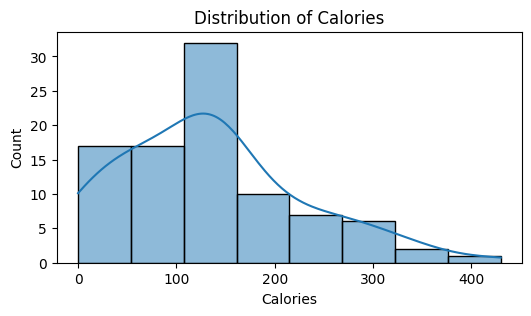

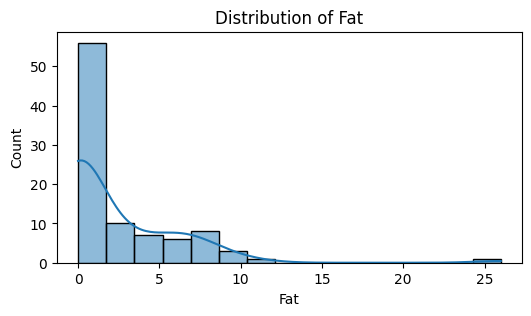

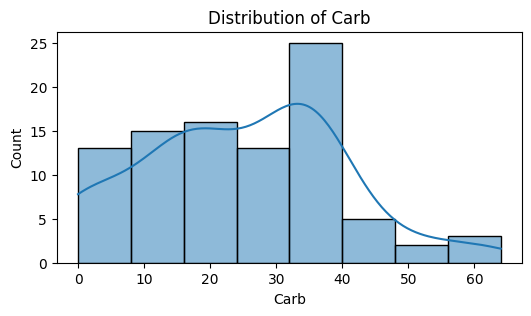

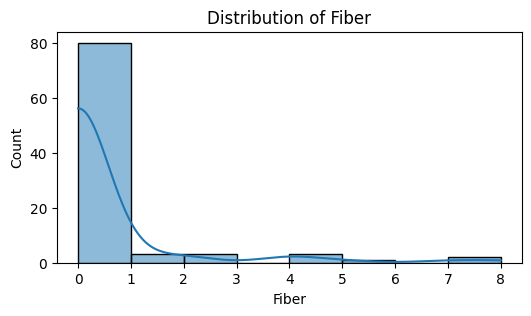

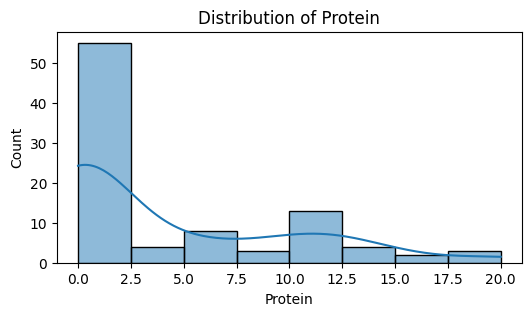

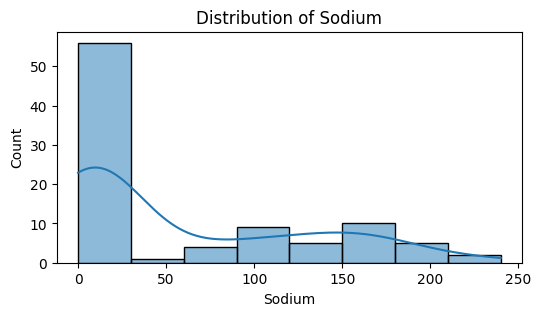

In [128]:
for col in data1_cleaned.iloc[:, 1:].columns:
    plt.figure(figsize=(6, 3)) # Set size of histograms
    sns.histplot(data=data1_cleaned, x=col, kde=True, element='bars').set_title('Distribution of ' + col) # Create histogram
    plt.show()

## 2.Correlation between the nutrients

In [41]:
data_main = data1_cleaned.copy()
columns_to_remove = ['Beverage_Name']

data_main = data_main.drop(columns=columns_to_remove)

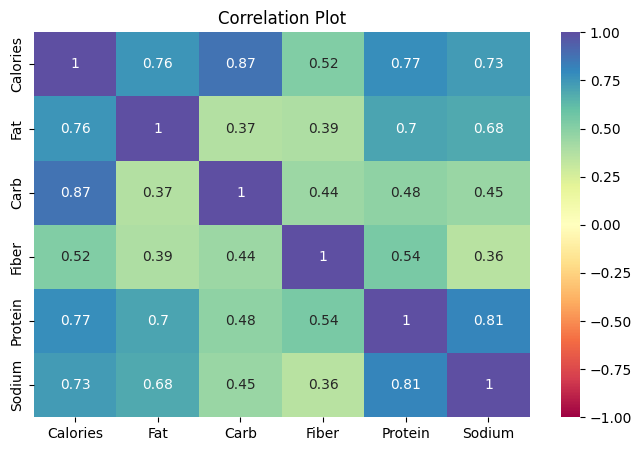

In [42]:
plt.figure(figsize=(8,5))
corrplot = sns.heatmap(data_main.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

***Here We can see that there is a high positive correlation between Carb and calories.*** 

### 3.Finding Top 10 and bottom 10 beverages of nutrient category relevant to Analysis.

### 3.1 Calorie

In [148]:
# Sort the DataFrame by 'Calories' column in descending order
descending_calories = data1_cleaned[['Beverage_Name', 'Calories']].sort_values('Calories', ascending=False)

# Sort the DataFrame by 'Calories' column in ascending order
ascending_calories = data1_cleaned[['Beverage_Name', 'Calories']].sort_values('Calories')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_calories.head(15)
top_15_ascending = ascending_calories.head(15)

print("Top 15 Descending Calories:")
print(top_15_descending)

print("\nBottom 15 Ascending Calories:")
print(top_15_ascending)

Top 15 Descending Calories:
                                   Beverage_Name  Calories
110          StarbucksÂ® Signature Hot Chocolate     430.0
139                        White Chocolate Mocha     360.0
146  Cinnamon Dolce FrappuccinoÂ® Blended Coffee     350.0
172                           Chocolate Smoothie     320.0
109                                Hot Chocolate     320.0
173                          Strawberry Smoothie     300.0
133                   Iced White Chocolate Mocha     300.0
113                                 CaffÃ¨ Mocha     290.0
158           Mocha FrappuccinoÂ® Blended Coffee     280.0
117                         Cinnamon Dolce Latte     260.0
129             Iced Coconutmilk Mocha Macchiato     260.0
115                            Caramel Macchiato     250.0
118                  Coconutmilk Mocha Macchiato     250.0
126                       Iced Caramel Macchiato     250.0
138                                Vanilla Latte     250.0

Bottom 15 Ascending Calorie

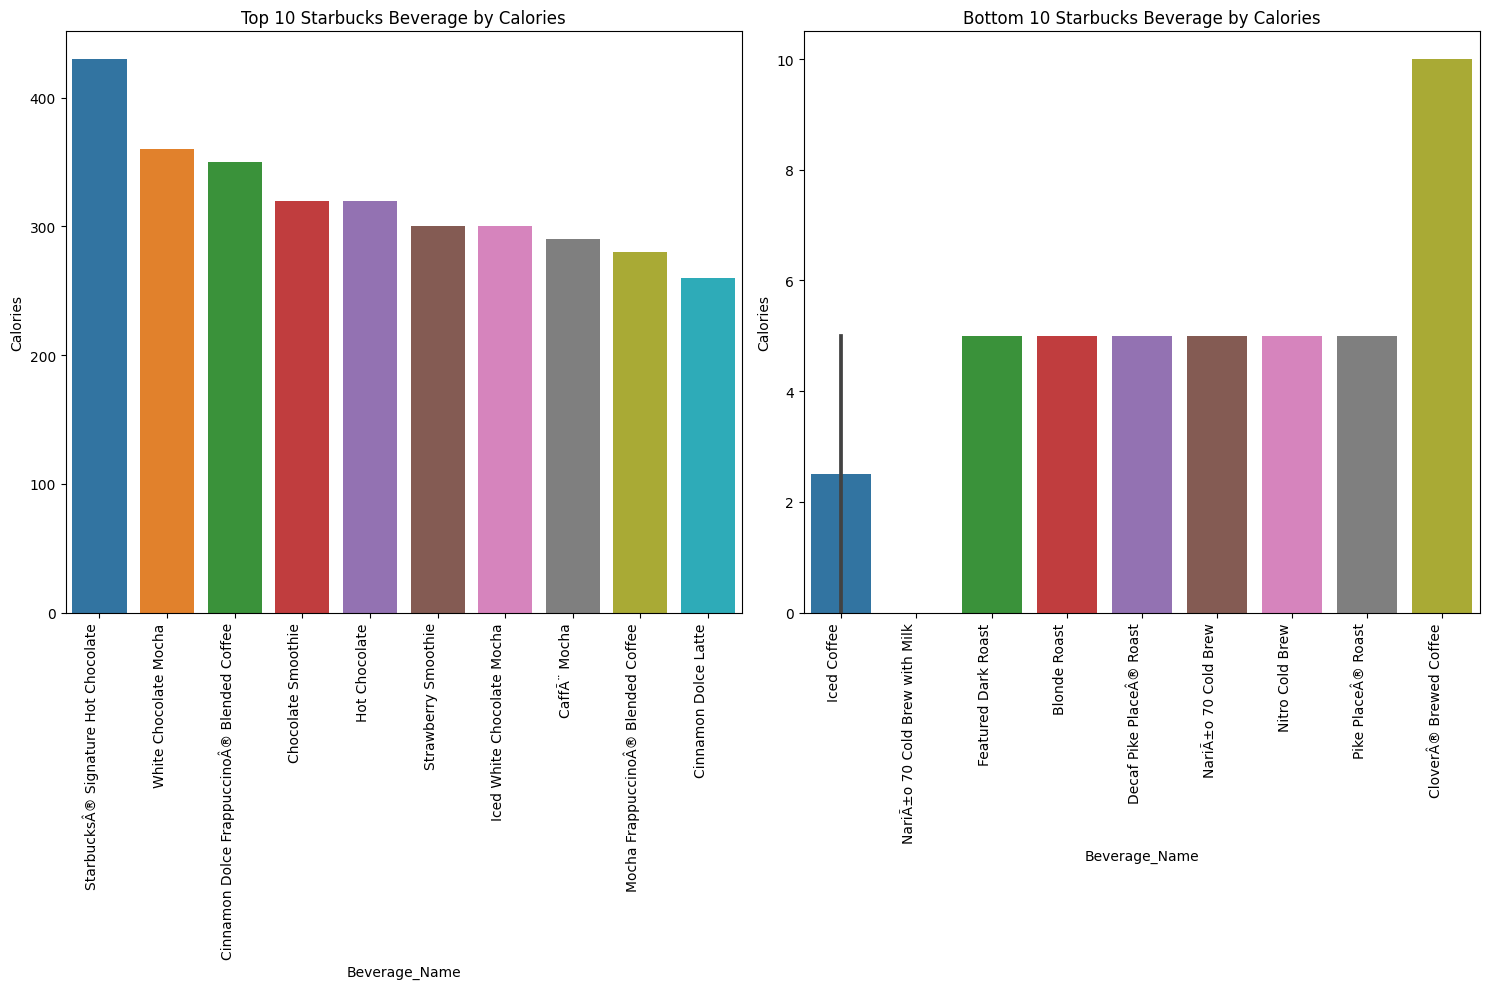

In [147]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

top_10 = data1_cleaned.sort_values(by='Calories', ascending=False).head(10)
bottom_10 = data1_cleaned.sort_values(by='Calories').head(10)

# Plot the top 10 items on the left subplot
sns.barplot(x="Beverage_Name", y="Calories", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Beverage by Calories")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Beverage_Name", y="Calories", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Beverage by Calories")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 3.2 Fat

In [150]:
# Sort the DataFrame by 'Fat' column in descending order
descending_Fat = data1_cleaned[['Beverage_Name', 'Fat']].sort_values('Fat', ascending=False)

# Sort the DataFrame by 'Fat' column in ascending order
ascending_Fat = data1_cleaned[['Beverage_Name', 'Fat']].sort_values('Fat')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_Fat.head(15)
top_15_ascending = ascending_Fat.head(15)

print("Top 15 Descending Fat:")
print(top_15_descending)

print("\nBottom 15 Ascending Fat:")
print(top_15_ascending)

Top 15 Descending Fat:
                           Beverage_Name   Fat
110  StarbucksÂ® Signature Hot Chocolate  26.0
139                White Chocolate Mocha  11.0
118          Coconutmilk Mocha Macchiato   9.0
129     Iced Coconutmilk Mocha Macchiato   9.0
109                        Hot Chocolate   9.0
113                         CaffÃ¨ Mocha   8.0
133           Iced White Chocolate Mocha   8.0
126               Iced Caramel Macchiato   7.0
112                         CaffÃ¨ Latte   7.0
115                    Caramel Macchiato   7.0
135                      Latte Macchiato   7.0
134                      Latte Macchiato   7.0
122                           Flat White   7.0
108        Vanilla Sweet Cream Cold Brew   6.0
138                        Vanilla Latte   6.0

Bottom 15 Ascending Fat:
                                 Beverage_Name  Fat
0   Cool Lime Starbucks Refreshersâ¢ Beverage  0.0
71             StarbucksÂ® Iced Coffee Caramel  0.0
72     StarbucksÂ® Iced Coffee Light Sweete

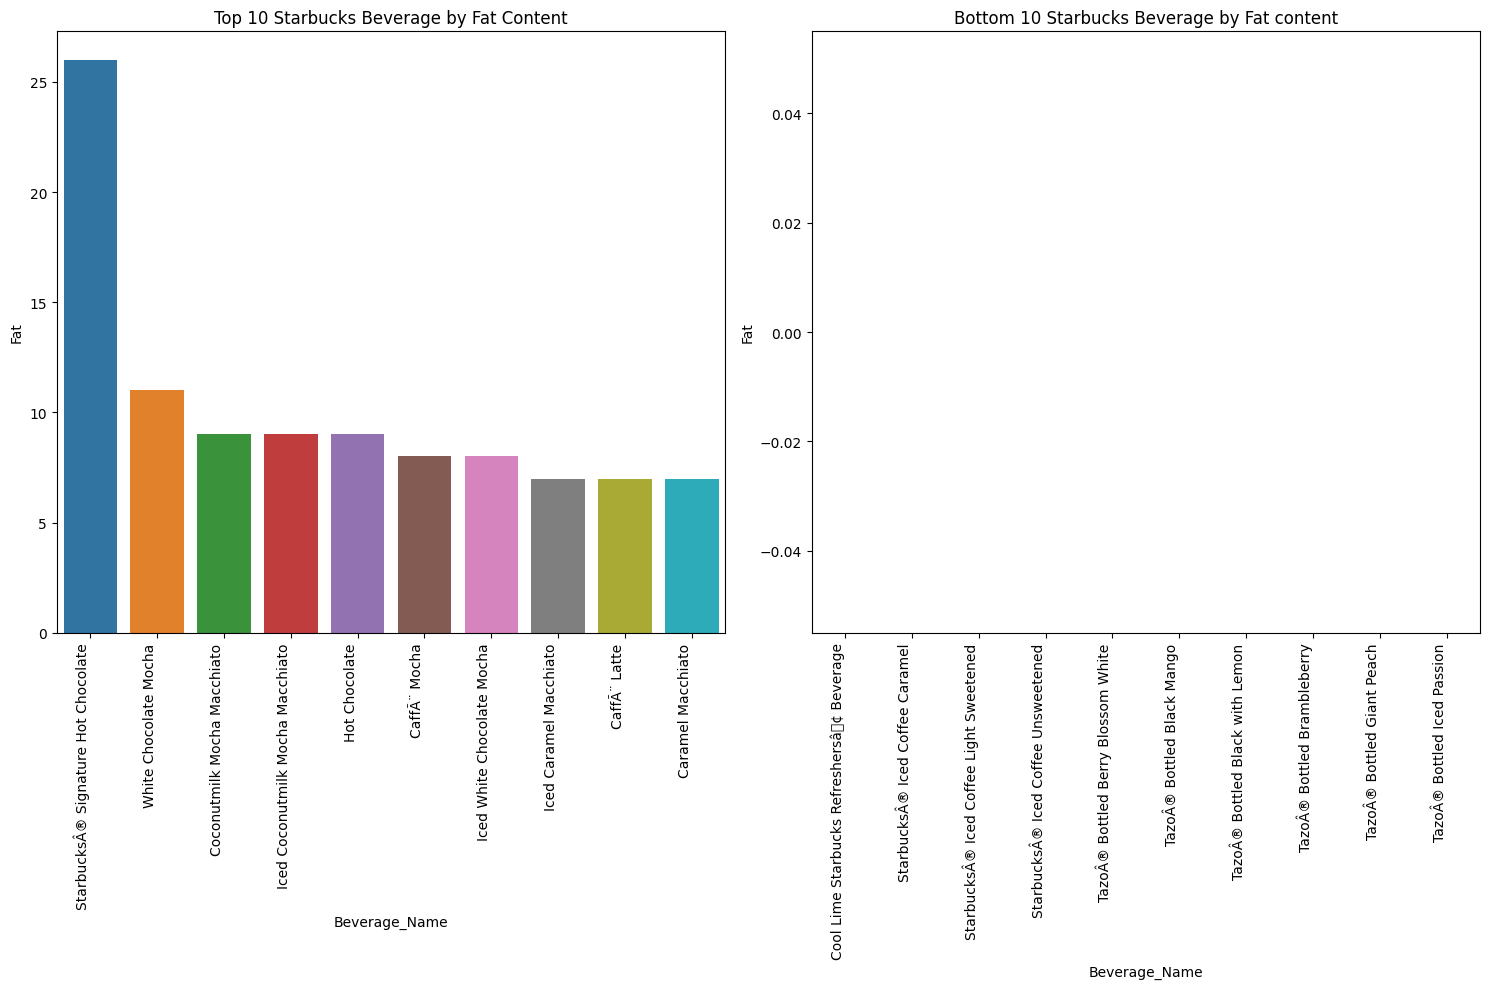

In [136]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))


top_10 = data1_cleaned.sort_values(by='Fat', ascending=False).head(10)
bottom_10 = data1_cleaned.sort_values(by='Fat').head(10)

# Plot the top 10 items on the left subplot
sns.barplot(x="Beverage_Name", y="Fat", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Beverage by Fat Content")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Beverage_Name", y="Fat", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Beverage by Fat content")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 3.3 Carbohydrates

In [152]:
# Sort the DataFrame by 'carb' column in descending order
descending_Carb = data1_cleaned[['Beverage_Name', 'Carb']].sort_values('Carb', ascending=False)

# Sort the DataFrame by 'carb' column in ascending order
ascending_Carb = data1_cleaned[['Beverage_Name', 'Carb']].sort_values('Carb')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_Carb.head(15)
top_15_ascending = ascending_Carb.head(15)

print("Top 15 Descending Carb:")
print(top_15_descending)

print("\nBottom 15 Ascending Carb:")
print(top_15_ascending)

Top 15 Descending Carb:
                                   Beverage_Name  Carb
146  Cinnamon Dolce FrappuccinoÂ® Blended Coffee  64.0
173                          Strawberry Smoothie  60.0
158           Mocha FrappuccinoÂ® Blended Coffee  60.0
172                           Chocolate Smoothie  53.0
139                        White Chocolate Mocha  53.0
133                   Iced White Chocolate Mocha  47.0
109                                Hot Chocolate  47.0
110          StarbucksÂ® Signature Hot Chocolate  45.0
113                                 CaffÃ¨ Mocha  42.0
117                         Cinnamon Dolce Latte  40.0
78                    TazoÂ® Bottled Black Mango  38.0
88                      TazoÂ® Bottled Tazoberry  38.0
20                    TazoÂ® Bottled Black Mango  38.0
30                      TazoÂ® Bottled Tazoberry  38.0
23                    TazoÂ® Bottled Giant Peach  37.0

Bottom 15 Ascending Carb:
                              Beverage_Name  Carb
94                 

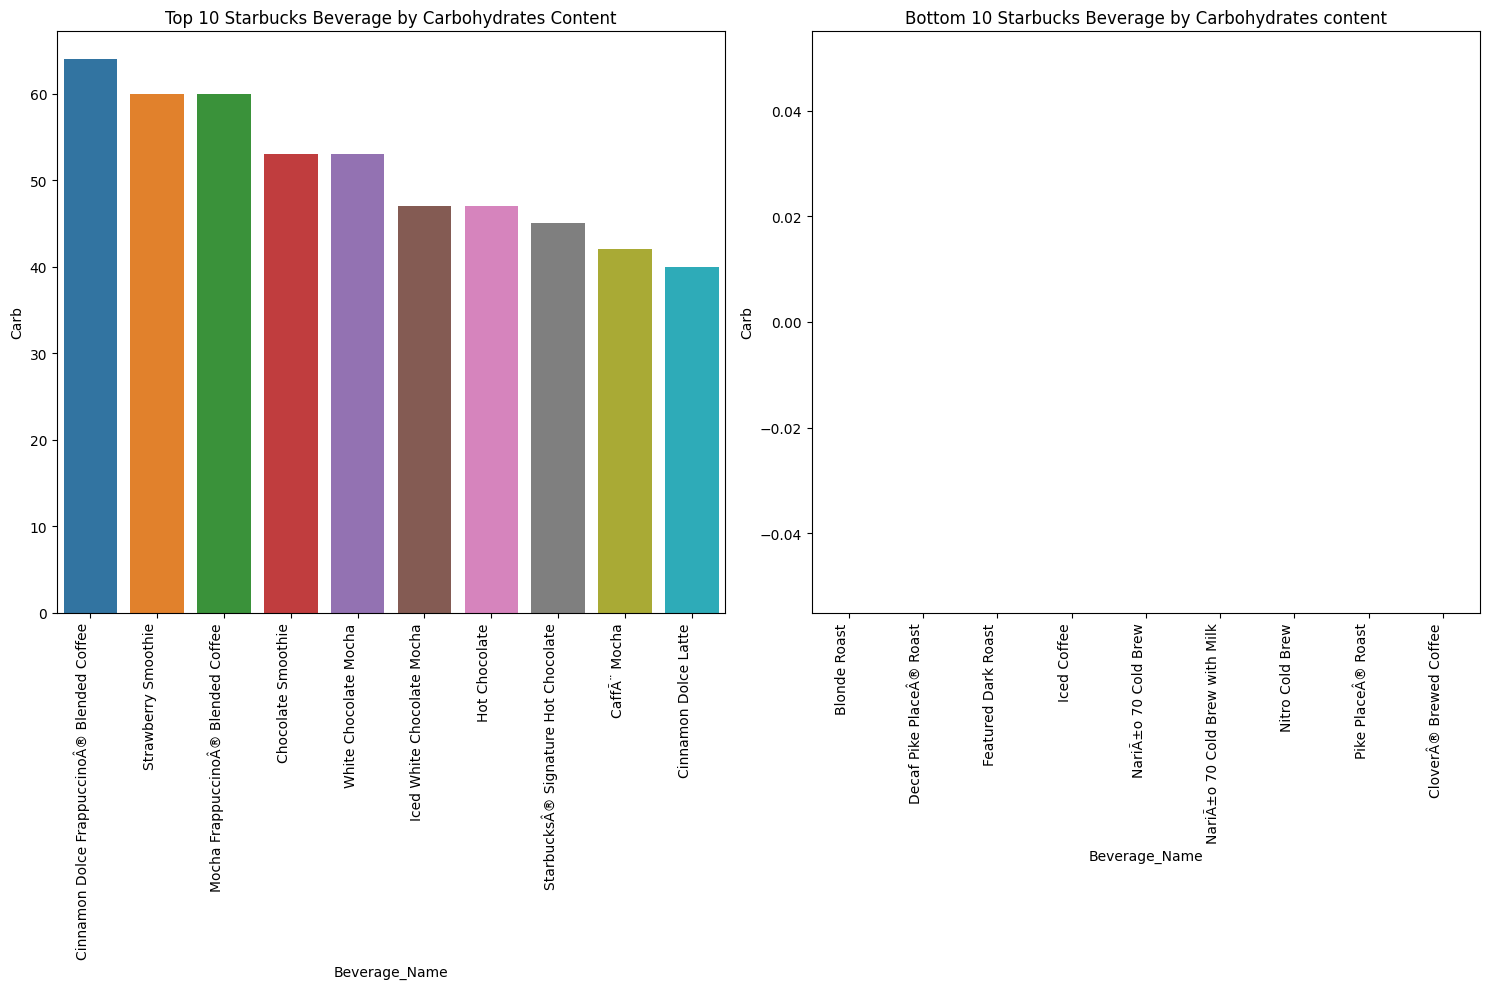

In [151]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))


top_10 = data1_cleaned.sort_values(by='Carb', ascending=False).head(10)
bottom_10 = data1_cleaned.sort_values(by='Carb').head(10)

# Plot the top 10 items on the left subplot
sns.barplot(x="Beverage_Name", y="Carb", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Beverage by Carbohydrates Content")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Beverage_Name", y="Carb", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Beverage by Carbohydrates content")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Conclusion
***We see a high positive correlation between carbs and calories here.***


***We have tried to analyse top 10 beverage with high and low value of Fat, Calories and Carb.***
